In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 1: Read the CSV file
df = pd.read_csv('LPGdesbutanizerStepTest.csv', delimiter=";", index_col=0)
df.columns = ['TBOTTOM', 'QREFLUX', 'C2LPG', 'C5LPG']
print(df)

              TBOTTOM  QREFLUX     C2LPG     C5LPG
Time Minutes                                      
0                 166    10648  0.013969  0.015270
1                 166    10648  0.013969  0.015270
2                 166    10648  0.013969  0.015270
3                 166    10648  0.013969  0.015270
4                 166    10648  0.013969  0.015270
...               ...      ...       ...       ...
975               166    10648  0.013969  0.015351
976               166    10648  0.013969  0.015351
977               166    10648  0.013969  0.015350
978               166    10648  0.013969  0.015350
979               166    10648  0.013969  0.015350

[980 rows x 4 columns]


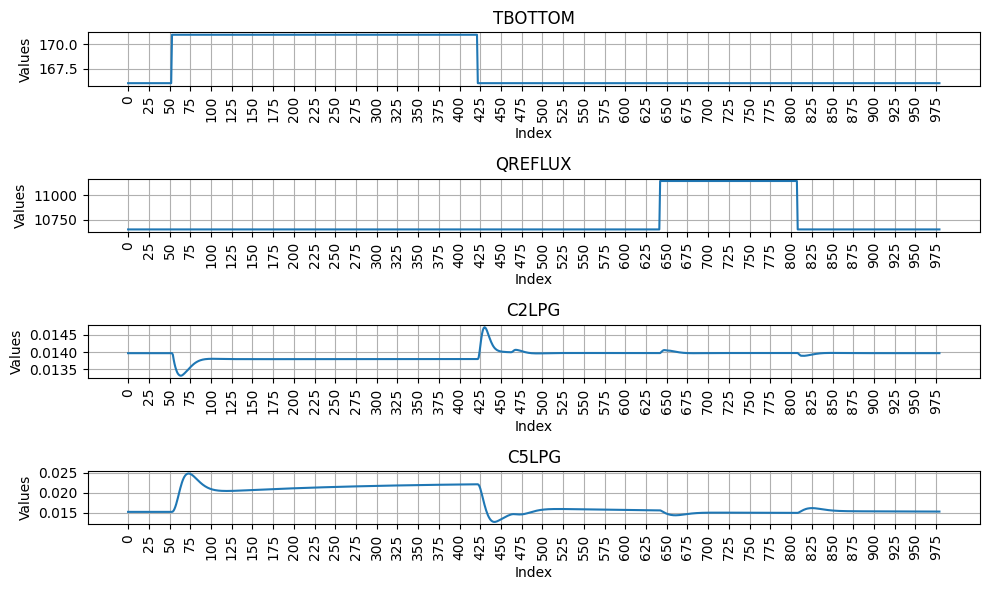

In [3]:
import matplotlib.pyplot as plt

# Number of columns to plot
num_columns = len(df.columns)

# Creating subplots
fig, axs = plt.subplots(num_columns, 1, figsize=(10, 6))  # Adjust figsize as needed

# Plotting each column on a separate subplot
for i, column in enumerate(df.columns):
    axs[i].plot(df.index, df[column])
    axs[i].set_title(column)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Values')
    axs[i].set_xticks(range(0, len(df.index), 25))
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees
    axs[i].grid(True)  # Add gridlines

plt.tight_layout()  # Adjust layout to not overlap subplots
plt.show()


In [4]:
NUM_U = 2
df_u = df.iloc[:, :NUM_U]
df_y = df.iloc[:, NUM_U:]

In [5]:
# Constant for response size
RESPONSE_SIZE = 75

# Initialize an empty DataFrame to store the response
df_responses = pd.DataFrame()

# Iterate over the columns of df_u
for column in df_u.columns:
    # Initialize variables to store the step moment and previous u value
    step_moment = None
    prev_u = None

    # Iterate over the rows of df_u
    for index, row in df_u.iterrows():
        # If the previous u value is not None and the current u value is different from the previous one
        if prev_u is not None and row[column] != prev_u:
            step_moment = index  # Set the step moment to the current index
            step_amplitude = row[column] - prev_u  # Calculate the step amplitude
            break  # Break the loop as we found the step moment

        prev_u = row[column]  # Update the previous u value

    # Ensure that the step moment allows enough data for the response size
    if step_moment is not None and step_moment + RESPONSE_SIZE <= df_u.index[-1]:
        # Extract the output response (from the step moment to RESPONSE_SIZE rows after)
        step_responses = df_y.loc[step_moment:step_moment + RESPONSE_SIZE - 1]

        # Reset the index of the response DataFrame
        step_responses.reset_index(drop=True, inplace=True)

        # Rename the columns of the response DataFrame
        step_responses.columns = [f"{column} x {col}" for col in step_responses.columns]

        # Divide each value in the response column by the amplitude of the step
        step_responses = step_responses / step_amplitude

        # Subtract all values in the column by the first value
        step_responses = step_responses - step_responses.iloc[0]

        # Concatenate the response DataFrame to the df_responses DataFrame
        df_responses = pd.concat([df_responses, step_responses], axis=1)

# Compute the maximum absolute value of each column in df_responses
max_abs_values = df_responses.abs().max()

# Convert the maximum absolute values to scientific notation with two decimal places
max_abs_values_scientific = max_abs_values.apply(lambda x: '{:.2e}'.format(x))

# Print the maximum absolute value of each column in scientific notation
print(max_abs_values_scientific)



TBOTTOM x C2LPG    1.30e-04
TBOTTOM x C5LPG    1.91e-03
QREFLUX x C2LPG    1.73e-07
QREFLUX x C5LPG    2.44e-06
dtype: object


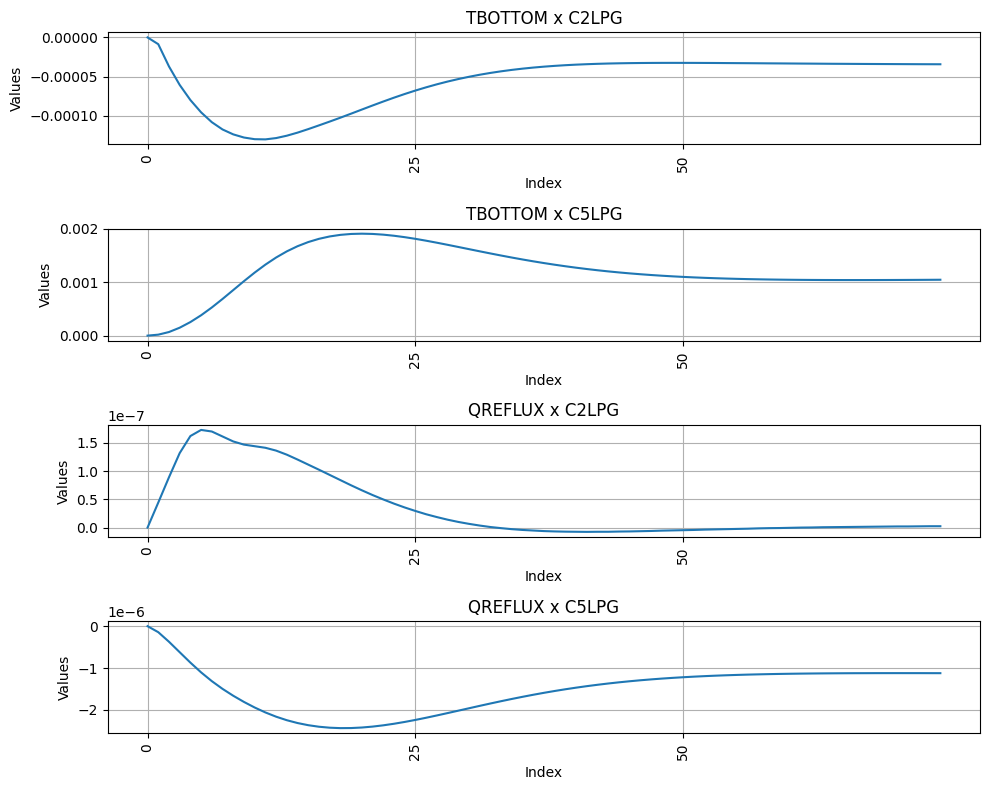

In [6]:
# Number of columns to plot
num_columns = len(df_responses.columns)

# Creating subplots
fig, axs = plt.subplots(num_columns, 1, figsize=(10, 8))  # Adjust figsize as needed

# Plotting each column on a separate subplot
for i, column in enumerate(df_responses.columns):
    axs[i].plot(step_responses.index, df_responses[column])
    axs[i].set_title(column)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Values')
    axs[i].set_xticks(range(0, len(df_responses.index), 25))
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees
    axs[i].grid(True)  # Add gridlines

plt.tight_layout()  # Adjust layout to not overlap subplots
plt.show()

In [7]:
# Constant for response size
RESPONSE_SIZE = 75

# Initialize an empty DataFrame to store the response
df_responses = pd.DataFrame()

# Initialize a counter to track the number of step moments found
step_counter = 0

# Iterate over the columns of df_u
for column in df_u.columns:
    # Initialize variables to store the step moment and previous u value
    step_moment = None
    prev_u = None

    # Iterate over the rows of df_u
    for index, row in df_u.iterrows():
        # If the previous u value is not None and the current u value is different from the previous one
        if prev_u is not None and row[column] != prev_u:
            step_counter += 1  # Increment the step counter
            if step_counter == 2:  # Check if this is the second step moment
                step_moment = index  # Set the step moment to the current index
                step_amplitude = row[column] - prev_u  # Calculate the step amplitude
                break  # Break the loop as we found the second step moment

        prev_u = row[column]  # Update the previous u value

    # Ensure that the step moment allows enough data for the response size
    if step_moment is not None and step_moment + RESPONSE_SIZE <= df_u.index[-1]:
        # Extract the output response (from the step moment to RESPONSE_SIZE rows after)
        step_responses = df_y.loc[step_moment:step_moment + RESPONSE_SIZE - 1]

        # Reset the index of the response DataFrame
        step_responses.reset_index(drop=True, inplace=True)

        # Rename the columns of the response DataFrame
        step_responses.columns = [f"{column} x {col}" for col in step_responses.columns]

        # Divide each value in the response column by the amplitude of the step
        step_responses = step_responses / step_amplitude

        # Subtract all values in the column by the first value
        step_responses = step_responses - step_responses.iloc[0]

        # Concatenate the response DataFrame to the df_responses DataFrame
        df_responses = pd.concat([df_responses, step_responses], axis=1)

# Compute the maximum absolute value of each column in df_responses
max_abs_values = df_responses.abs().max()

# Convert the maximum absolute values to scientific notation with two decimal places
max_abs_values_scientific = max_abs_values.apply(lambda x: '{:.2e}'.format(x))

# Print the maximum absolute value of each column in scientific notation
print(max_abs_values_scientific)


TBOTTOM x C2LPG    1.84e-04
TBOTTOM x C5LPG    1.88e-03
dtype: object


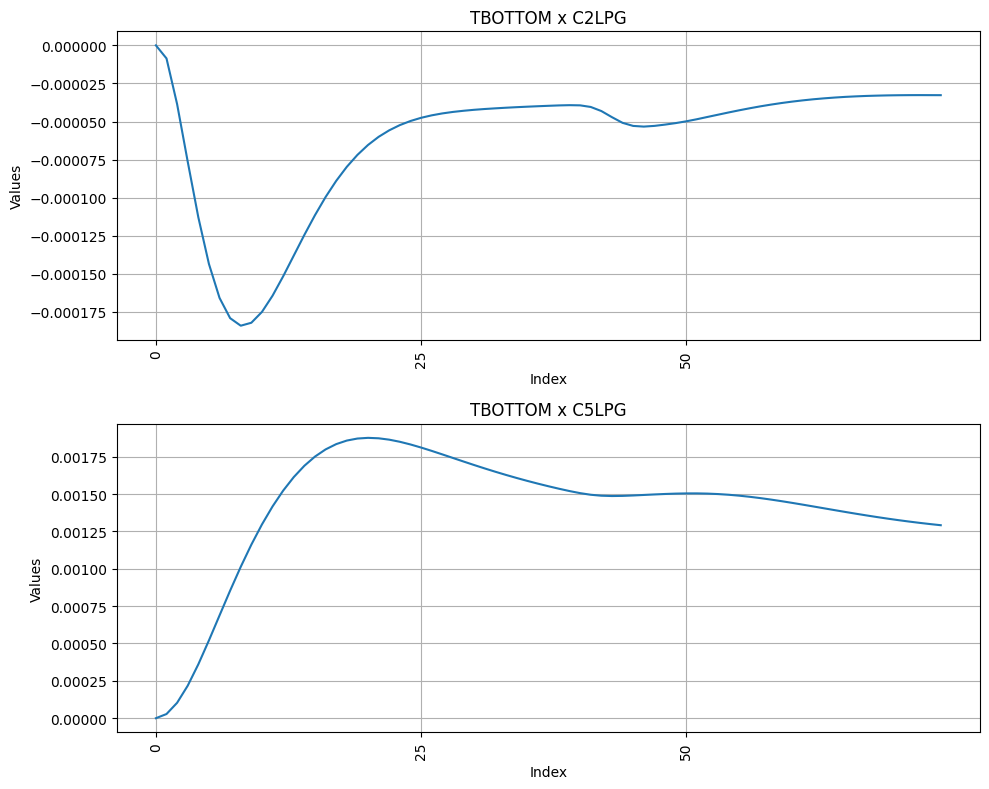

In [8]:
# Number of columns to plot
num_columns = len(df_responses.columns)

# Creating subplots
fig, axs = plt.subplots(num_columns, 1, figsize=(10, 8))  # Adjust figsize as needed

# Plotting each column on a separate subplot
for i, column in enumerate(df_responses.columns):
    axs[i].plot(step_responses.index, df_responses[column])
    axs[i].set_title(column)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Values')
    axs[i].set_xticks(range(0, len(df_responses.index), 25))
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees
    axs[i].grid(True)  # Add gridlines

plt.tight_layout()  # Adjust layout to not overlap subplots
plt.show()